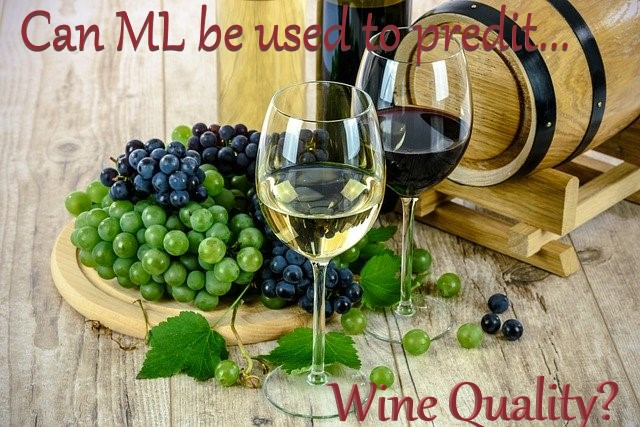

In [1]:
from IPython.display import Image
# from IPython.core.display import HTML 
# Image(url= "http://my_site.com/my_picture.jpg")
PATH = "Images/"
Image(filename = PATH + "TitleImage.jpg", width=600, height=600)

# Variables

Input variables:
fixed acidity,
volatile acidity,
citric acid, 
residual sugar, 
chlorides, 
free sulfur dioxide,
total sulfur dioxide,
density,
pH,
sulphates,
alcohol

Output variable is quality


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline

In [3]:
#Read csv file

redWine = pd.read_csv("wineQualityReds.csv")
redWine = redWine[['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide','total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]


whiteWine = pd.read_csv("wineQualityWhites.csv")
whiteWine = whiteWine[['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide','total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]
# whiteWine.head()

combined = pd.concat([redWine, whiteWine], ignore_index=True, sort=False)
# display(np.round(combined.describe()))

redWine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check for nulls
# redWine.isnull().any()

In [5]:
# redWine.info()

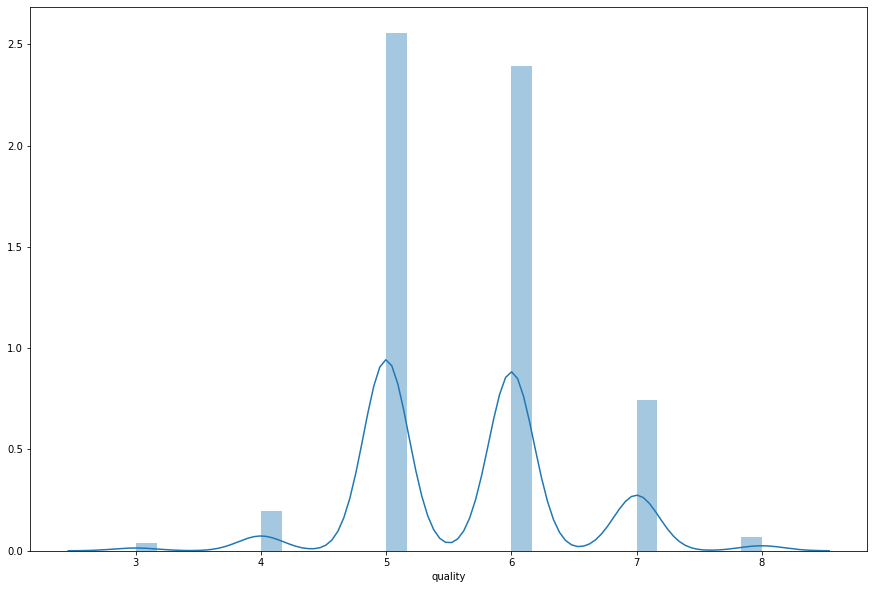

In [6]:
#look at distribution by quality
# print(redWine.groupby('quality').size())

#Average value of quality
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(redWine['quality'])

In [7]:
# Some more additional data analysis
display(np.round(redWine.describe()))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


In [8]:
# distribution of the input attributes
# box and whisker plots

# redWine.plot(kind='box', subplots=True, layout=(2, 6), sharex=False, sharey=False)
# plt.show()

In [9]:
# redWine.hist()
# plt.show()

C:\Users\Krys\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Krys\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


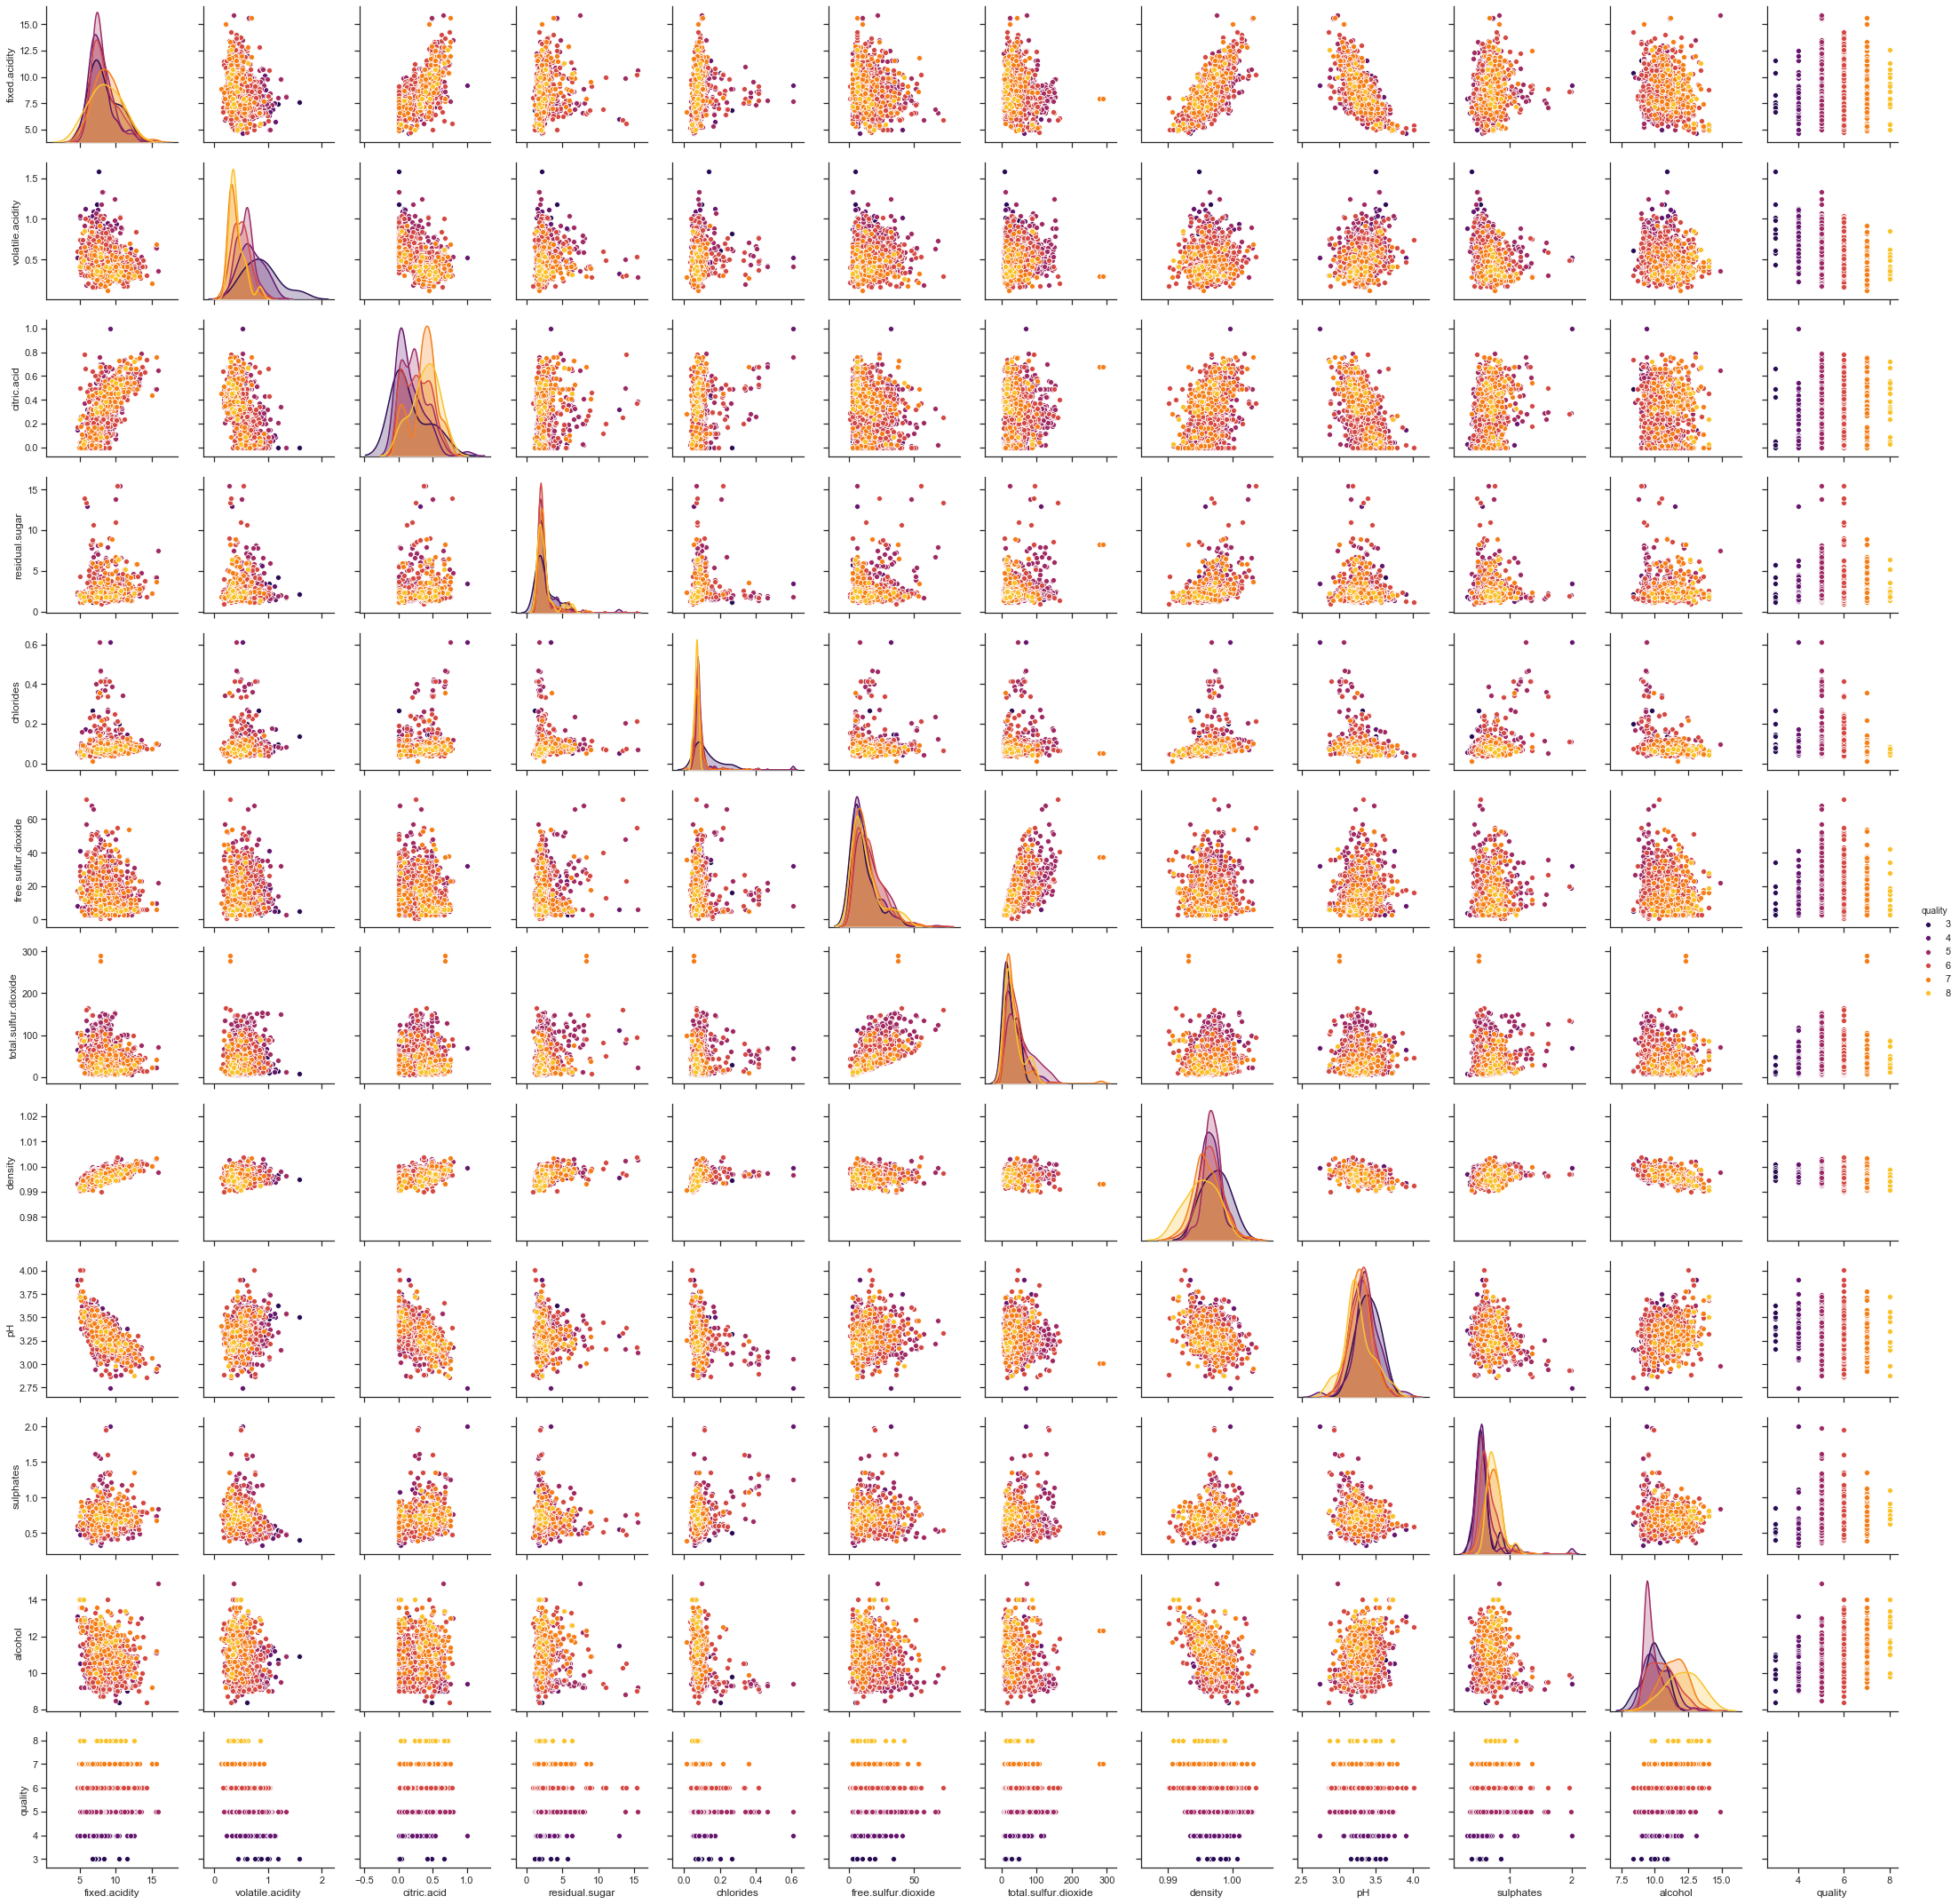

In [10]:
sns.set(style="ticks")

# df = sns.load_dataset("redWine")
sns.pairplot(data=redWine, hue="quality", palette = "inferno")

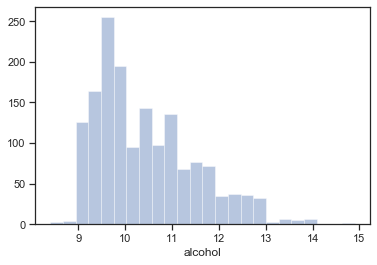

In [13]:
sns.distplot(redWine['alcohol'],kde=0)

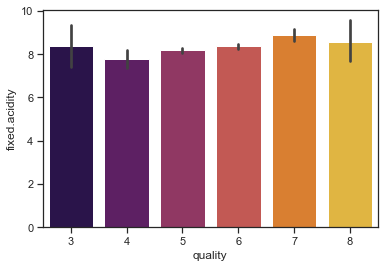

In [12]:
# Plot to see how independent data columns are distributed
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'fixed.acidity', data = redWine, palette = "inferno")

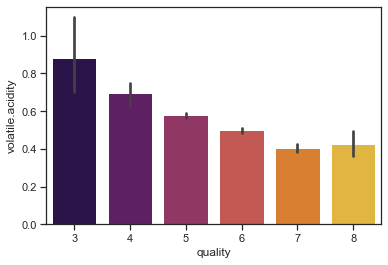

In [13]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'volatile.acidity', data = redWine, palette = "inferno")

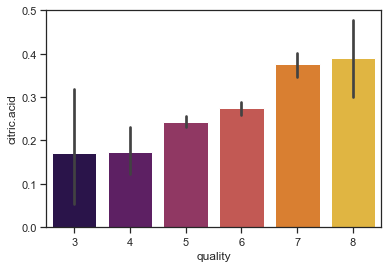

In [14]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'citric.acid', data = redWine, palette = "inferno")

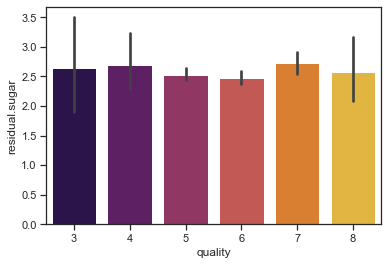

In [15]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'residual.sugar', data = redWine, palette = "inferno")

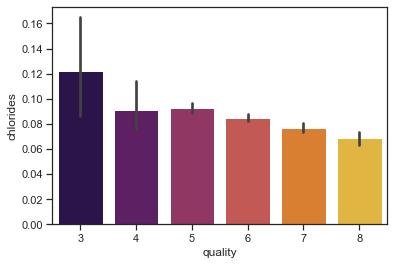

In [16]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'chlorides', data = redWine, palette = "inferno")

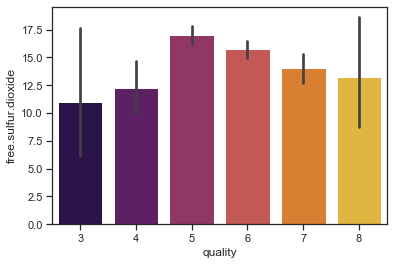

In [17]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'free.sulfur.dioxide', data = redWine, palette = "inferno")

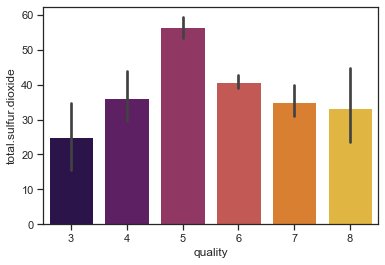

In [18]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'total.sulfur.dioxide', data = redWine, palette = "inferno")

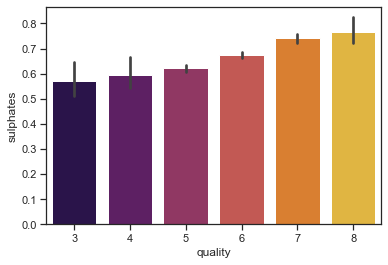

In [19]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'sulphates', data = redWine, palette = "inferno")

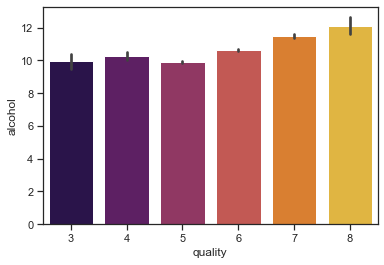

In [20]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'alcohol', data = redWine, palette = "inferno")

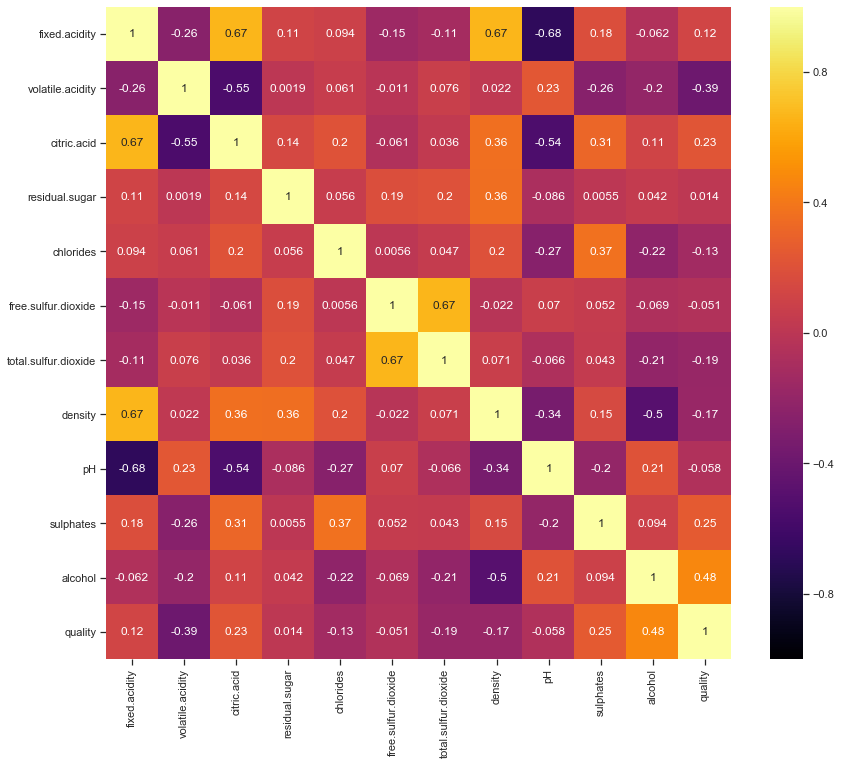

In [21]:
correlation = redWine.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="inferno")

In [23]:
X = np.array(redWine.drop(['quality'], 1))
y = np.array(redWine['quality'])

# X = np.array(combined.drop(['quality'], 1))
# y = np.array(combined['quality'])

# Split-out test dataset 80% training, %20 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )

1279  samples in training data
 320  samples in test data



# Linear Regression

In [25]:
#Create model and fit
model = LinearRegression()
model.fit(X_train, y_train)

r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

# #To retrieve the intercept:
# print(model.intercept_)
# #For retrieving the slope:
# print(model.coef_)

y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

coefficient of determination: 0.3593724283394686


,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529


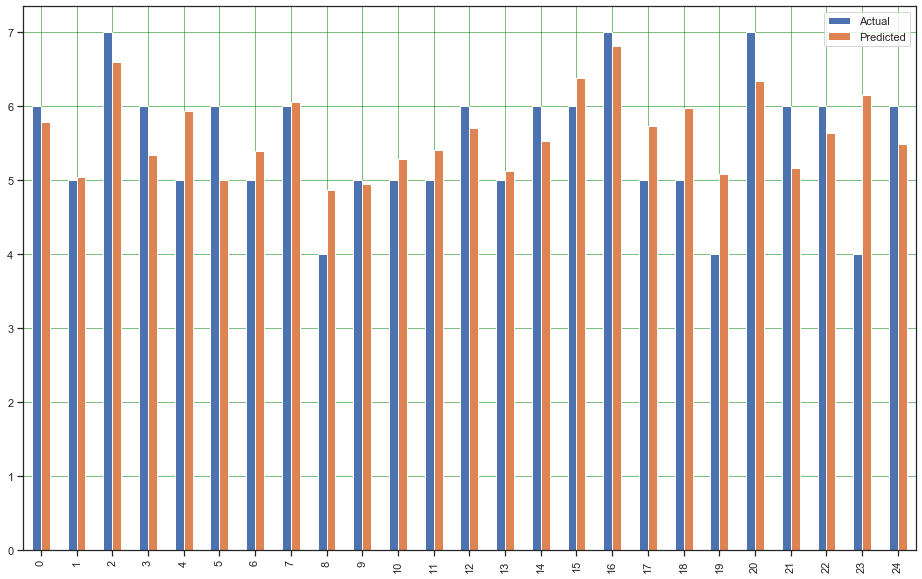

In [26]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46963309286611105
Mean Squared Error: 0.38447119782012473
Root Mean Squared Error: 0.620057414938427


# Compare Models
6 different algorithms:

Logistic Regression (LR) Linear Discriminant Analysis (LDA) K-Nearest Neighbors (KNN). Classification and Regression Trees (CART). Gaussian Naive Bayes (NB). Support Vector Machines (SVM).

C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


LR: 0.567871 (0.029642)
LDA: 0.578016 (0.032134)
KNN: 0.494977 (0.040537)


C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


CART: 0.581254 (0.048931)
NB: 0.538802 (0.042353)


C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


SVM: 0.551437 (0.036942)


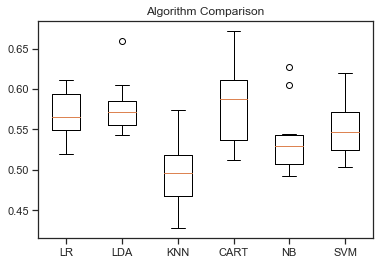

In [28]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [29]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# print(f"First 10 Predictions:   {predictions[:10]}")
# print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [30]:
 df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
 df.head()

,Prediction,Actual
0,5,6
1,5,5
2,7,7
3,6,6
4,5,5


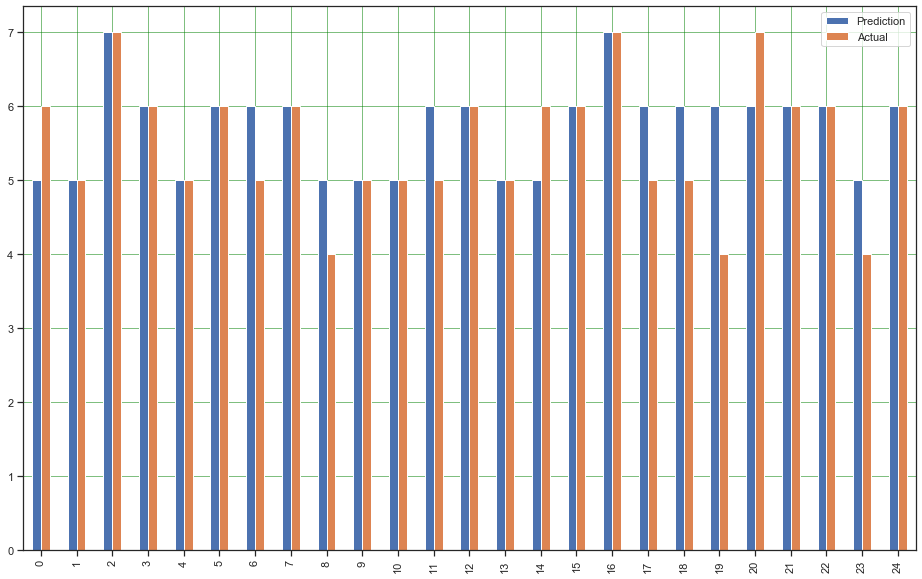

In [31]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Conclusions
The algorithm was not very accurate but can still make reasonably good predictions.




# Contributing factors
Need more data.  

Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case.  

Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.  


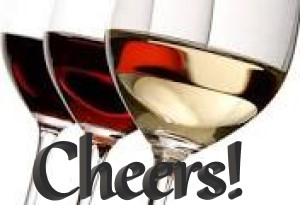

In [32]:
PATH = "Images/"
Image(filename = PATH + "Cheers.jpg", width=600, height=600)

In [31]:
# # K nearest neighbors
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# print('Accuracy of K-NN classifier on training set: {:.2f}'
#      .format(knn.score(X_train, y_train)))
# print('Accuracy of K-NN classifier on test set: {:.2f}'
#      .format(knn.score(X_test, y_test)))

In [32]:
# # Linear Discriminant Analysis
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda = LinearDiscriminantAnalysis()
# lda.fit(X_train, y_train)
# print('Accuracy of LDA classifier on training set: {:.2f}'
#      .format(lda.score(X_train, y_train)))
# print('Accuracy of LDA classifier on test set: {:.2f}'
#      .format(lda.score(X_test, y_test)))

In [33]:
# # from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)
# print('Accuracy of GNB classifier on training set: {:.2f}'
#      .format(gnb.score(X_train, y_train)))
# print('Accuracy of GNB classifier on test set: {:.2f}'
#      .format(gnb.score(X_test, y_test)))

In [34]:
# # from sklearn.svm import SVC
# svm = SVC()
# svm.fit(X_train, y_train)
# print('Accuracy of SVM classifier on training set: {:.2f}'
#      .format(svm.score(X_train, y_train)))
# print('Accuracy of SVM classifier on test set: {:.2f}'
#      .format(svm.score(X_test, y_test)))

In [35]:
# predictions = svm.predict(X_test)

# print(f"First 10 Predictions:   {predictions[:10]}")
# print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [36]:
#  df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
#  df.head()